In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/e-commerce-shoppers-behaviour-understanding/test_data_v2.csv
/kaggle/input/e-commerce-shoppers-behaviour-understanding/train_data_v2.csv
/kaggle/input/e-commerce-shoppers-behaviour-understanding/sample.csv


Assume that you are working in a consultancy company and one of your client is running an e-commerce company. They are interested in understanding the customer behavior regarding the shopping. They have already collected the users’ session data for a year. Each row belongs to a different user. The “Made_purchase” is an indicator that whether the user has made a purchase or not during that year. Your client is also interested in predicting that column using other attributes of the users. The client also informs you that the data is collected by non-experts. So, it might have some percentage of error in some columns.

## Data Exploration

In [3]:
data = pd.read_csv("/kaggle/input/e-commerce-shoppers-behaviour-understanding/train_data_v2.csv")
data['Made_Purchase']=data['Made_Purchase'].astype(int)

In [4]:
data.shape

(14731, 22)

In [5]:
data.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,1.0,9.0,3.0,Returning_Visitor,Not Specified,Deny,Not Specified,Other,0.0,0
1,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,2.0,2.0,4.0,Returning_Visitor,Female,Deny,Others,Married,0.0,0
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,3.0,1.0,4.0,Returning_Visitor,Female,ALL,Others,Married,1.0,0
3,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.4,...,4.0,3.0,3.0,Returning_Visitor,Male,ALL,Diploma,Single,0.0,0
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,...,2.0,1.0,5.0,Returning_Visitor,Male,Deny,Diploma,Other,1.0,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14578 non-null  float64
 1   HomePage_Duration                14581 non-null  float64
 2   LandingPage                      14578 non-null  float64
 3   LandingPage_Duration             14596 non-null  float64
 4   ProductDescriptionPage           14608 non-null  float64
 5   ProductDescriptionPage_Duration  14564 non-null  float64
 6   GoogleMetric:Bounce Rates        14580 non-null  float64
 7   GoogleMetric:Exit Rates          14602 non-null  float64
 8   GoogleMetric:Page Values         14599 non-null  float64
 9   SeasonalPurchase                 14581 non-null  float64
 10  Month_SeasonalPurchase           14587 non-null  object 
 11  OS                               14597 non-null  float64
 12  SearchEngine      

In [8]:
numeric_col = (data.select_dtypes(exclude=['object','bool'])).columns
categ_col = (data.select_dtypes(include='object')).columns

In [9]:
print('The number of numeric columns:',len(numeric_col))
print('The number of categorical columns:',len(categ_col))

The number of numeric columns: 16
The number of categorical columns: 6


## Data Imputation


In [10]:
import numpy as np
import matplotlib.pyplot as plt

HomePage :


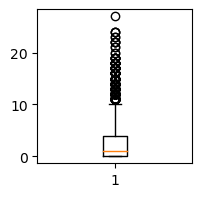

Lower Bound: -6.0
Upper Bound: 10.0
Data points below Lower Bound: 0
Data points above Upper Bound: 372
-------------------------------------------------------------------------------------------------
HomePage_Duration :


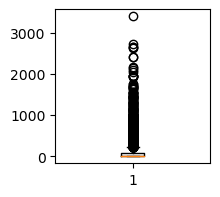

Lower Bound: -6.0
Upper Bound: 10.0
Data points below Lower Bound: 0
Data points above Upper Bound: 5689
-------------------------------------------------------------------------------------------------
LandingPage :


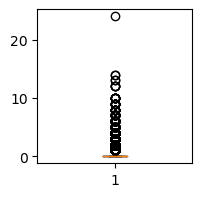

Lower Bound: -6.0
Upper Bound: 10.0
Data points below Lower Bound: 0
Data points above Upper Bound: 9
-------------------------------------------------------------------------------------------------
LandingPage_Duration :


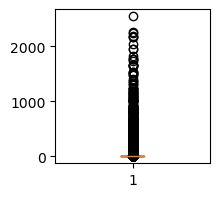

Lower Bound: -6.0
Upper Bound: 10.0
Data points below Lower Bound: 0
Data points above Upper Bound: 2086
-------------------------------------------------------------------------------------------------
ProductDescriptionPage :


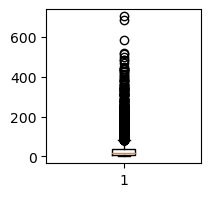

Lower Bound: -6.0
Upper Bound: 10.0
Data points below Lower Bound: 0
Data points above Upper Bound: 7713
-------------------------------------------------------------------------------------------------
ProductDescriptionPage_Duration :


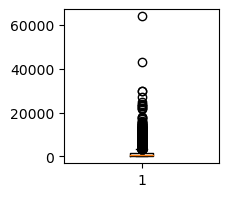

Lower Bound: -6.0
Upper Bound: 10.0
Data points below Lower Bound: 0
Data points above Upper Bound: 10968
-------------------------------------------------------------------------------------------------
GoogleMetric:Bounce Rates :


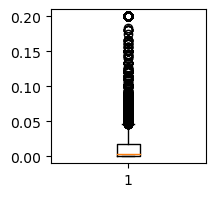

Lower Bound: -6.0
Upper Bound: 10.0
Data points below Lower Bound: 0
Data points above Upper Bound: 0
-------------------------------------------------------------------------------------------------
GoogleMetric:Exit Rates :


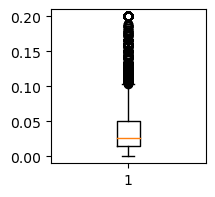

Lower Bound: -6.0
Upper Bound: 10.0
Data points below Lower Bound: 0
Data points above Upper Bound: 0
-------------------------------------------------------------------------------------------------
GoogleMetric:Page Values :


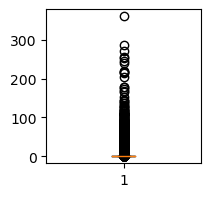

Lower Bound: -6.0
Upper Bound: 10.0
Data points below Lower Bound: 0
Data points above Upper Bound: 1445
-------------------------------------------------------------------------------------------------
SeasonalPurchase :


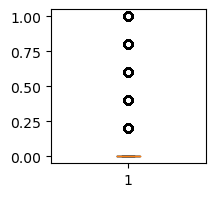

Lower Bound: -6.0
Upper Bound: 10.0
Data points below Lower Bound: 0
Data points above Upper Bound: 0
-------------------------------------------------------------------------------------------------
OS :


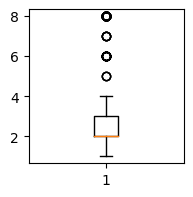

Lower Bound: -6.0
Upper Bound: 10.0
Data points below Lower Bound: 0
Data points above Upper Bound: 0
-------------------------------------------------------------------------------------------------
SearchEngine :


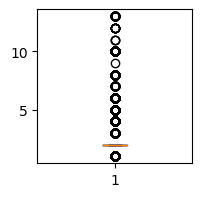

Lower Bound: -6.0
Upper Bound: 10.0
Data points below Lower Bound: 0
Data points above Upper Bound: 69
-------------------------------------------------------------------------------------------------
Zone :


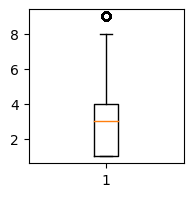

Lower Bound: -6.0
Upper Bound: 10.0
Data points below Lower Bound: 0
Data points above Upper Bound: 0
-------------------------------------------------------------------------------------------------
Type of Traffic :


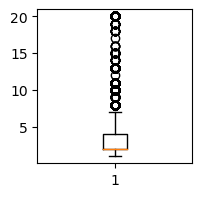

Lower Bound: -6.0
Upper Bound: 10.0
Data points below Lower Bound: 0
Data points above Upper Bound: 1248
-------------------------------------------------------------------------------------------------
WeekendPurchase :


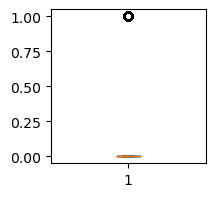

Lower Bound: -6.0
Upper Bound: 10.0
Data points below Lower Bound: 0
Data points above Upper Bound: 0
-------------------------------------------------------------------------------------------------
Made_Purchase :


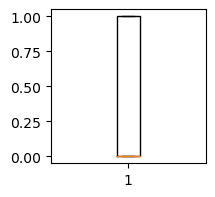

Lower Bound: -6.0
Upper Bound: 10.0
Data points below Lower Bound: 0
Data points above Upper Bound: 0
-------------------------------------------------------------------------------------------------


In [11]:
data_outlier = data.copy()
data_outlier.dropna(axis=0, inplace=True)
for feature in numeric_col:
  print(feature,':')
  fig = plt.figure(figsize =(2, 2))
  plt.boxplot(data_outlier[feature])
  plt.show()
  Q1 = np.percentile(data_outlier['HomePage'], 25)
  Q3 = np.percentile(data_outlier['HomePage'], 75)
  IQR = Q3 - Q1
  upper=Q3+1.5*IQR
  upper_array=np.array(data_outlier[feature]>upper)
  lower=Q1-1.5*IQR
  lower_array=np.array(data_outlier[feature]<lower)
  print('Lower Bound:',lower)
  print('Upper Bound:',upper)
  print('Data points below Lower Bound:',lower_array.sum())
  print('Data points above Upper Bound:',upper_array.sum()) 
  print('-------------------------------------------------------------------------------------------------')



In [12]:
data_outlier.corr()['Made_Purchase']

HomePage                           0.055183
HomePage_Duration                  0.048764
LandingPage                        0.048369
LandingPage_Duration               0.030237
ProductDescriptionPage             0.074173
ProductDescriptionPage_Duration    0.073878
GoogleMetric:Bounce Rates         -0.050999
GoogleMetric:Exit Rates           -0.072994
GoogleMetric:Page Values           0.214072
SeasonalPurchase                  -0.019965
OS                                 0.003708
SearchEngine                       0.013459
Zone                              -0.007485
Type of Traffic                   -0.000774
WeekendPurchase                    0.008598
Made_Purchase                      1.000000
Name: Made_Purchase, dtype: float64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14578 non-null  float64
 1   HomePage_Duration                14581 non-null  float64
 2   LandingPage                      14578 non-null  float64
 3   LandingPage_Duration             14596 non-null  float64
 4   ProductDescriptionPage           14608 non-null  float64
 5   ProductDescriptionPage_Duration  14564 non-null  float64
 6   GoogleMetric:Bounce Rates        14580 non-null  float64
 7   GoogleMetric:Exit Rates          14602 non-null  float64
 8   GoogleMetric:Page Values         14599 non-null  float64
 9   SeasonalPurchase                 14581 non-null  float64
 10  Month_SeasonalPurchase           14587 non-null  object 
 11  OS                               14597 non-null  float64
 12  SearchEngine      

In [15]:
data.skew()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


HomePage                           2.033559
HomePage_Duration                  5.922487
LandingPage                        4.145429
LandingPage_Duration               7.997997
ProductDescriptionPage             4.459032
ProductDescriptionPage_Duration    8.580754
GoogleMetric:Bounce Rates          2.830608
GoogleMetric:Exit Rates            2.067722
GoogleMetric:Page Values           7.588103
SeasonalPurchase                   3.217069
OS                                 2.087637
SearchEngine                       3.224702
Zone                               0.973204
Type of Traffic                    1.928581
WeekendPurchase                    1.255688
Made_Purchase                      0.474322
dtype: float64

If the skewness is between -0.5 and 0.5, the data are 
fairly symmetrical

If the skewness is between -1 and -0.5 or between 0.5 and 1, the data are moderately skewed

If the skewness is less than -1 or greater than 1, the data are highly skewed

Except 'Zone', every feature has mod(skewness) greater than 1, therefore apply imputation with strategy = median; and not strategy = mean due to high skewness

In [16]:
mode_impute = categ_col
median_impute = numeric_col

**Mean/ Median /Mode imputation:**

**Mean:** It is preferred if data is numeric and not skewed.

**Median:** It is preferred if data is numeric and skewed.

**Mode:** It is preferred if the data is a string(object) or numeric.

In [17]:
for num_f in numeric_col:
  data[num_f] = data[num_f].fillna(data[num_f].median())

for cat_f in categ_col:
  data[cat_f] = data[cat_f].fillna(data[cat_f].mode()[0])

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14731 non-null  float64
 1   HomePage_Duration                14731 non-null  float64
 2   LandingPage                      14731 non-null  float64
 3   LandingPage_Duration             14731 non-null  float64
 4   ProductDescriptionPage           14731 non-null  float64
 5   ProductDescriptionPage_Duration  14731 non-null  float64
 6   GoogleMetric:Bounce Rates        14731 non-null  float64
 7   GoogleMetric:Exit Rates          14731 non-null  float64
 8   GoogleMetric:Page Values         14731 non-null  float64
 9   SeasonalPurchase                 14731 non-null  float64
 10  Month_SeasonalPurchase           14731 non-null  object 
 11  OS                               14731 non-null  float64
 12  SearchEngine      

## Categorical Encoding

In [1]:
data = pd.get_dummies(data)
data
data.shape

NameError: name 'pd' is not defined

## Scaling

In [20]:
from sklearn.preprocessing import RobustScaler

rc = RobustScaler()
data[numeric_col] = rc.fit_transform(data[numeric_col])

In [21]:
data.describe()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,Cookies Setting_ALL,Cookies Setting_Deny,Cookies Setting_Required,Education_Diploma,Education_Graduate,Education_Not Specified,Education_Others,Marital Status_Married,Marital Status_Other,Marital Status_Single
count,14731.000000,14731.000000,14731.000000,14731.000000,14731.000000,14731.000000,14731.000000,14731.000000,14731.000000,14731.000000,...,14731.000000,14731.000000,14731.000000,14731.000000,14731.00000,14731.000000,14731.000000,14731.000000,14731.000000,14731.000000
mean,0.412418,0.817158,0.485643,33.149341,0.464736,0.477486,1.115417,0.512201,4.769496,0.063431,...,0.322857,0.346752,0.330392,0.247980,0.25056,0.239291,0.262168,0.321092,0.344987,0.333922
std,1.091125,1.984610,1.246848,139.538986,1.490918,1.609099,2.821653,1.407237,16.817646,0.201651,...,0.467584,0.475952,0.470370,0.431855,0.43335,0.426665,0.439829,0.466912,0.475380,0.471628
min,-0.333333,-0.055556,0.000000,0.000000,-0.583333,-0.470341,-0.197101,-0.747353,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.333333,-0.055556,0.000000,0.000000,-0.350000,-0.327065,-0.197101,-0.332258,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.666667,0.944444,0.000000,0.000000,0.650000,0.672935,0.802899,0.667742,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,1.00000,0.000000,1.000000,1.000000,1.000000,1.000000
max,8.666667,37.708333,24.000000,2549.375000,22.916667,51.023154,11.136232,4.913025,361.763742,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


## Splitting the dataset

In [22]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=7)
for train_index, test_index in split.split(data, data["Made_Purchase"]):
    train_data = data.loc[train_index]
    test_data = data.loc[test_index]



In [23]:
train_data.shape, test_data.shape

((11784, 42), (2947, 42))

In [24]:
train_data["Made_Purchase"].value_counts()/len(train_data['Made_Purchase'])

0.0    0.615411
1.0    0.384589
Name: Made_Purchase, dtype: float64

In [25]:
test_data["Made_Purchase"].value_counts()/len(test_data['Made_Purchase'])

0.0    0.615202
1.0    0.384798
Name: Made_Purchase, dtype: float64

In [26]:
train_data.reset_index(inplace=True)
train_data.drop(['index'],axis=1,inplace=True)

test_data.reset_index(inplace=True)
test_data.drop(['index'],axis=1,inplace=True)

In [27]:
train_data.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,Cookies Setting_ALL,Cookies Setting_Deny,Cookies Setting_Required,Education_Diploma,Education_Graduate,Education_Not Specified,Education_Others,Marital Status_Married,Marital Status_Other,Marital Status_Single
0,-0.333333,-0.055556,0.0,0.0,-0.250000,0.034746,0.936232,0.667742,0.000000,0.0,...,1,0,0,0,0,0,1,1,0,0
1,-0.333333,-0.055556,2.0,65.5,-0.450000,-0.412789,-0.197101,0.196044,0.000000,0.0,...,1,0,0,0,0,1,0,0,0,1
2,-0.333333,-0.055556,0.0,0.0,0.283333,1.225831,0.093497,0.268613,0.000000,0.0,...,0,0,1,0,0,0,1,1,0,0
3,-0.333333,-0.055556,0.0,0.0,0.750000,0.771126,-0.197101,0.148874,0.000000,0.0,...,1,0,0,0,0,0,1,0,0,1
4,0.666667,3.788889,1.0,15.2,0.383333,0.420879,0.146333,-0.557702,69.914392,0.0,...,1,0,0,0,0,0,1,0,0,1


## Base Model

In [28]:
y_train=train_data['Made_Purchase']
X_train=train_data.drop(columns=['Made_Purchase'])

y_test=test_data['Made_Purchase']
X_test=test_data.drop(columns=['Made_Purchase'])

In [29]:
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

def score_model(model):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  score = f1_score(y_test,y_pred)
  print('Mean F1 score of {0}: {1}'.format(model, score))
  #print(confusion_matrix(y_valid,y_pred))
  #scores = cross_val_score(model, X_train, y_train, cv=3)
  #print('Score of Model: ', scores)
  #print('Mean:', scores.mean())
  #print('Standard Deviation:', scores.std())

In [32]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

for model in [DummyClassifier(strategy="most_frequent"), LogisticRegression(random_state=7), AdaBoostClassifier(random_state=7), DecisionTreeClassifier(random_state=7),
              RandomForestClassifier(random_state=7),XGBClassifier(random_state=7)]:
  score_model(model)


Mean F1 score of DummyClassifier(strategy='most_frequent'): 0.0


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Mean F1 score of LogisticRegression(random_state=7): 0.2863187588152327
Mean F1 score of AdaBoostClassifier(random_state=7): 0.4089264173703257
Mean F1 score of DecisionTreeClassifier(random_state=7): 0.26164705882352934
Mean F1 score of RandomForestClassifier(random_state=7): 0.2785821268097853
Mean F1 score of XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=7,
              reg_alpha=0, reg_la

In [33]:
from sklearn.model_selection import GridSearchCV

xgb_classifier = XGBClassifier(random_state=7)

params = {'max_depth': [2,3,4,5],
          'learning_rate': [0.001,0.005,0.01],
          'n_estimators': [2,3,4,5,6,7,8,9,10]
          }

xgb_classif = GridSearchCV(estimator = xgb_classifier, param_grid = params, scoring = 'f1')

xgb_classif.fit(X_train, y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_...e,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                              

In [34]:
xgb_classif.best_params_

{'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 2}

In [35]:
score_model(xgb_classif.best_estimator_)

Mean F1 score of XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.001, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=2, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=7,
              reg_alpha=0, reg_lambda=1, ...): 0.406006006006006


In [ ]:
#score_model(RandomForestClassifier(min_samples_split=2,n_estimators=100,min_samples_leaf=1))

In [ ]:
""""
rf_classifier = RandomForestClassifier()

params = {'min_samples_split': [1,2,4,6,8],
          'n_estimators': [25,50,100],
          'min_samples_leaf': [1, 2, 4, 6],
          }

rf_classif = GridSearchCV(estimator = rf_classifier, param_grid = params, scoring = 'f1')

rf_classif.fit(X_train, y_train)
""""

In [ ]:
#rf_classif.best_params_

In [ ]:
#score_model(rf_classif.best_estimator_)

In [ ]:
#from sklearn.ensemble import AdaBoostClassifier

#score_model(AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0, algorithm='SAMME.R'))

In [ ]:
""""
adb_classifier = AdaBoostClassifier()

params = {'learning_rate': [0.1,1,5,10],
          'n_estimators': [25,50,100,200],
          'algorithm': ['SAMME','SAMME.R'],
          }

adb_classif = GridSearchCV(estimator = adb_classifier, param_grid = params, scoring = 'f1')

adb_classif.fit(X_train, y_train)
""""

In [ ]:
#adb_classif.best_params_

In [ ]:
#score_model(adb_classif.best_estimator_)

## Testing

In [36]:
test=pd.read_csv("/kaggle/input/e-commerce-shoppers-behaviour-understanding/test_data_v2.csv")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         6548 non-null   float64
 1   HomePage_Duration                6544 non-null   float64
 2   LandingPage                      6543 non-null   float64
 3   LandingPage_Duration             6524 non-null   float64
 4   ProductDescriptionPage           6541 non-null   float64
 5   ProductDescriptionPage_Duration  6536 non-null   float64
 6   GoogleMetric:Bounce Rates        6533 non-null   float64
 7   GoogleMetric:Exit Rates          6548 non-null   float64
 8   GoogleMetric:Page Values         6554 non-null   float64
 9   SeasonalPurchase                 6554 non-null   float64
 10  Month_SeasonalPurchase           6541 non-null   object 
 11  OS                               6537 non-null   float64
 12  SearchEngine        

In [37]:
numeric_col = (test.select_dtypes(exclude=['object','bool'])).columns
categ_col = (test.select_dtypes(include='object')).columns
numeric_col.shape, categ_col.shape

((15,), (6,))

In [38]:
for num_f in numeric_col:
  test[num_f] = test[num_f].fillna(test[num_f].median())

for cat_f in categ_col:
  test[cat_f] = test[cat_f].fillna(test[cat_f].mode()[0])

In [39]:
rc = RobustScaler()
test[numeric_col] = rc.fit_transform(test[numeric_col])

In [40]:
test = pd.get_dummies(test)
test.shape

(6599, 41)

In [41]:
test.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,Cookies Setting_ALL,Cookies Setting_Deny,Cookies Setting_Required,Education_Diploma,Education_Graduate,Education_Not Specified,Education_Others,Marital Status_Married,Marital Status_Other,Marital Status_Single
0,-0.333333,-0.054167,0.0,0.0,-0.533333,-0.460928,11.317986,4.911554,0.0,0.0,...,0,1,0,0,0,1,0,0,0,1
1,-0.333333,-0.054167,0.0,0.0,-0.500000,-0.409205,-0.182014,2.081365,0.0,0.0,...,1,0,0,0,1,0,0,1,0,0
2,-0.333333,-0.054167,0.0,0.0,0.066667,-0.336296,0.725880,-0.053690,0.0,0.0,...,0,0,1,1,0,0,0,0,1,0
3,-0.333333,-0.054167,0.0,0.0,-0.500000,-0.431026,-0.182014,2.081365,0.0,0.8,...,0,0,1,0,1,0,0,0,1,0
4,-0.333333,-0.054167,0.0,0.0,-0.033333,-0.131400,0.896111,-0.017692,0.0,0.4,...,0,1,0,0,0,0,1,0,1,0


In [42]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         6599 non-null   float64
 1   HomePage_Duration                6599 non-null   float64
 2   LandingPage                      6599 non-null   float64
 3   LandingPage_Duration             6599 non-null   float64
 4   ProductDescriptionPage           6599 non-null   float64
 5   ProductDescriptionPage_Duration  6599 non-null   float64
 6   GoogleMetric:Bounce Rates        6599 non-null   float64
 7   GoogleMetric:Exit Rates          6599 non-null   float64
 8   GoogleMetric:Page Values         6599 non-null   float64
 9   SeasonalPurchase                 6599 non-null   float64
 10  OS                               6599 non-null   float64
 11  SearchEngine                     6599 non-null   float64
 12  Zone                

In [43]:
test.describe()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,Cookies Setting_ALL,Cookies Setting_Deny,Cookies Setting_Required,Education_Diploma,Education_Graduate,Education_Not Specified,Education_Others,Marital Status_Married,Marital Status_Other,Marital Status_Single
count,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,...,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000
mean,0.424458,0.794650,0.490529,32.533751,0.454044,0.464970,1.094476,0.489096,4.948134,0.063858,...,0.333232,0.323837,0.342931,0.244886,0.247916,0.247310,0.259888,0.327625,0.343537,0.328838
std,1.111442,1.867812,1.267924,133.961079,1.445558,1.542707,2.769719,1.362100,17.580386,0.202055,...,0.471405,0.467974,0.474725,0.430052,0.431836,0.431481,0.438606,0.469383,0.474925,0.469826
min,-0.333333,-0.054167,0.000000,0.000000,-0.566667,-0.460928,-0.182014,-0.748824,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.333333,-0.054167,0.000000,0.000000,-0.333333,-0.318220,-0.182014,-0.333729,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.666667,0.945833,0.000000,0.000000,0.666667,0.681780,0.817986,0.666271,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,8.333333,37.709722,24.000000,2549.375000,22.933333,51.239946,11.317986,4.911554,361.763742,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
#model4 = XGBClassifier(learning_rate=0.01, max_depth=3, n_estimators=5)
#y_t=data['Made_Purchase']
#X_t=data.drop(columns=['Made_Purchase'])
#model4.fit(X_t,y_t)
model1 = xgb_classif.best_estimator_  # {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
#model2 = rf_classif.best_estimator_  #min_samples_leaf=6, min_samples_split=8, n_estimators=50
#model3 = adb_classif.best_estimator_  #learning_rate=10
prediction=model1.predict(test)

In [45]:
prediction[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [46]:
prediction=prediction.astype(bool)

In [47]:
prediction[:20]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [ ]:
submission=pd.DataFrame(columns=['id', 'Made_Purchase'])
submission['id']=[i for i in range(len(prediction))]
submission["Made_Purchase"]=prediction
submission.to_csv('submission.csv',index=False)